In [2]:
import pandas as pd

# Cargar el dataset de Wine
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\MACHINE LEARNING\tarea 4 som y pca\wine pca\wine.data', header=None)


# Asignar nombres a las columnas (según el dataset)
data.columns = [
    'Target', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash', 'Magnesium',
    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 
    'Color_Intensity', 'Hue', 'OD280_OD315_of_diluted_wines', 'Proline'
]

# Visualizar las primeras filas del dataset
data.head()


,Target,Alcohol,Malic_Acid,Ash,Alcalinity_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Separar las características y las etiquetas
X = data.drop('Target', axis=1)  # Características
y = data['Target']  # Etiquetas (clase de vino)


In [4]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
from sklearn.decomposition import PCA

# Aplicar PCA y mantener suficientes componentes para explicar el 90% de la varianza
pca = PCA(n_components=0.9)  # El 90% de la varianza será explicada
X_pca = pca.fit_transform(X_scaled)

# Visualizar la cantidad de varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))


Varianza explicada por cada componente: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749]
Varianza total explicada: 0.9201754434577264


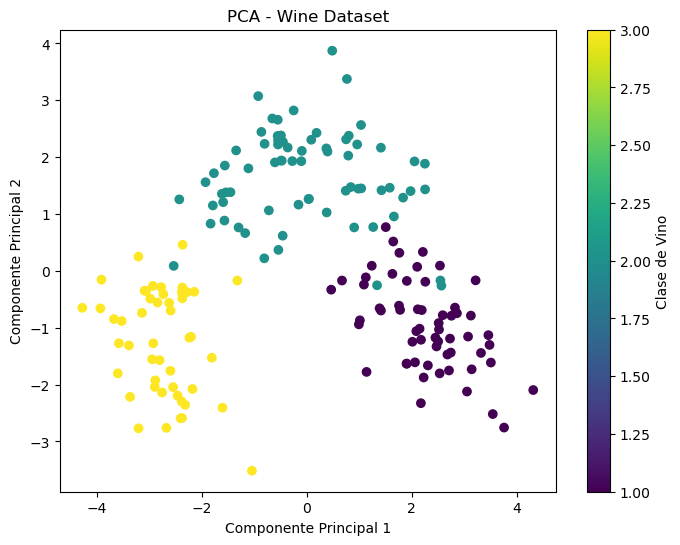

In [6]:
import matplotlib.pyplot as plt

# Gráfica de los primeros dos componentes principales
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Wine Dataset')
plt.colorbar(label='Clase de Vino')
plt.show()


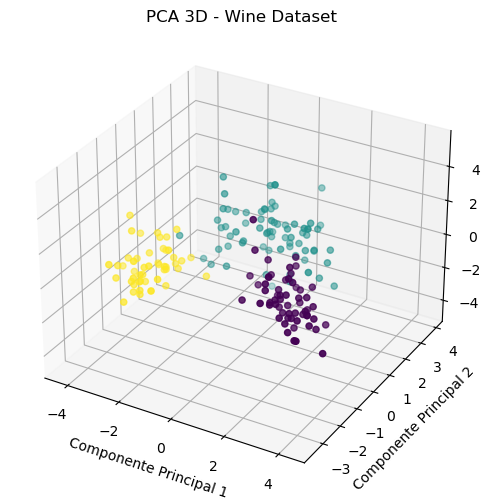

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Gráfica en 3D de los primeros tres componentes principales
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('PCA 3D - Wine Dataset')
plt.show()
